<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE': 1})
# 결과를 0과 1 로 바꿔주는 이유 : XGB와 LGBM 모델에서 에러남 -> scikit learn 라이브러리가 아니라 처리 안 해줌

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [ ]:
# 데이터 살펴보기
data.head()

**데이터 설명**

- COLLEGE: 대학 졸업여부
- INCOME: 연수입
- OVERAGE: 월평균 초과사용 시간(분)
- LEFTOVER: 월평균 잔여시간비율(%)
- HOUSE: 집값
- HANDSET_PRICE: 스마트폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월평균 장기통화(15분이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화 시간
- REPORTED_SATISFACTION: 만족도 설문조사 결과
- REPORTED_USAGE_LEVEL: 사용도 자가진단 결과
- CONSIDERING_CHANGE_OF_PLAN: 향후 변경계획 설문조사 결과
- CHURN: 이탈(번호이동) 여부

In [ ]:
# 기술통계 확인
data.describe()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [4]:
# 제거 대상: id
drop_cols = ['id']

# 변수 제거
data.drop('id', axis=1, inplace = True)

# 확인
list(data)

['COLLEGE',
 'INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'REPORTED_SATISFACTION',
 'REPORTED_USAGE_LEVEL',
 'CONSIDERING_CHANGE_OF_PLAN',
 'CHURN']

**2) x, y 분리**

In [8]:
# Target 설정
target = 'CHURN'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:,target]


**3) 가변수화**

In [9]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dumm_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
X = pd.get_dummies(X, columns=dumm_cols, drop_first=True, dtype = int)

# 확인
list(X)

['COLLEGE',
 'INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'REPORTED_SATISFACTION_sat',
 'REPORTED_SATISFACTION_unsat',
 'REPORTED_SATISFACTION_very_sat',
 'REPORTED_SATISFACTION_very_unsat',
 'REPORTED_USAGE_LEVEL_high',
 'REPORTED_USAGE_LEVEL_little',
 'REPORTED_USAGE_LEVEL_very_high',
 'REPORTED_USAGE_LEVEL_very_little',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'CONSIDERING_CHANGE_OF_PLAN_never_thought',
 'CONSIDERING_CHANGE_OF_PLAN_no',
 'CONSIDERING_CHANGE_OF_PLAN_perhaps']

**4) 학습용, 평가용 데이터 분리**

In [11]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**5) 정규화**

In [12]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [ ]:
# xgboost 설치
# !pip install xgboost

In [ ]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [13]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**1) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [16]:
# 선언하기
model = KNeighborsClassifier()

In [19]:
# 성능예측
cv_score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

In [20]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.59857143 0.58928571 0.60071429 0.59642857 0.58285714 0.62357143
 0.59071429 0.61       0.61071429 0.59214286]
0.5994999999999999


In [21]:
# 결과수집
result = {}
result['KNN'] = cv_score.mean()

**2) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [35]:
# 선언하기
model = DecisionTreeClassifier(max_depth = 5)

In [36]:
# 성능예측
cv_score = cross_val_score(model, X_train, y_train, cv=10)

In [37]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.71071429 0.68071429 0.685      0.67571429 0.68571429 0.69
 0.69071429 0.68857143 0.71285714 0.70928571]
0.6929285714285714


In [38]:
# 결과수집
result['Decision Tree'] = cv_score.mean()

**3) Logistic Regression**

- Logistic Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [39]:
# 선언하기
model = LogisticRegression()

In [40]:
# 성능예측
cv_score = cross_val_score(model, X_train, y_train, cv=10)

In [41]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.62428571 0.61714286 0.635      0.64571429 0.62928571 0.66071429
 0.66214286 0.65142857 0.63928571 0.63785714]
0.6402857142857143


In [42]:
# 결과수집
result['Logistic Regression'] = cv_score.mean()

**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [60]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [91]:
X_train.shape # 각 tree의 sample default 개수는 x[0].shape 즉 열의 개수가 된다. 여기선 20개씩 sampling

(14000, 20)

In [45]:
# 선언하기
model = RandomForestClassifier(max_depth=5) # 기본 100개의 트리를 만듦

In [51]:
# 성능예측
cv_score = cross_val_score(model, X_train, y_train, cv=10)

In [52]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.69571429 0.67571429 0.67714286 0.66571429 0.69714286 0.70142857
 0.7        0.70785714 0.70714286 0.69571429]
0.6923571428571429


In [53]:
# 결과수집
result['Random Forest'] = cv_score.mean()

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [71]:
# 선언하기
model = XGBClassifier(max_depth=5)

In [72]:
# 성능예측
cv_score = cross_val_score(model, X_train, y_train, cv=10)

In [73]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.70285714 0.68285714 0.67571429 0.66928571 0.66071429 0.68857143
 0.68571429 0.68285714 0.68214286 0.69642857]
0.6827142857142856


In [74]:
# 결과수집
result['XGBoost'] = cv_score.mean()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [67]:
# 선언하기
model = LGBMClassifier(max_depth=5, verbose=-1)

In [68]:
# 성능예측
cv_score = cross_val_score(model, X_train, y_train, cv=10)

In [69]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.71       0.68714286 0.68642857 0.67642857 0.68642857 0.69928571
 0.69571429 0.69357143 0.70857143 0.70214286]
0.6945714285714286


In [70]:
# 결과수집
result['LightGBM'] = cv_score.mean()

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [75]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.599
Decision Tree 0.693
Logistic Regression 0.64
Random Forest 0.692
XGBoost 0.683
LightGBM 0.695


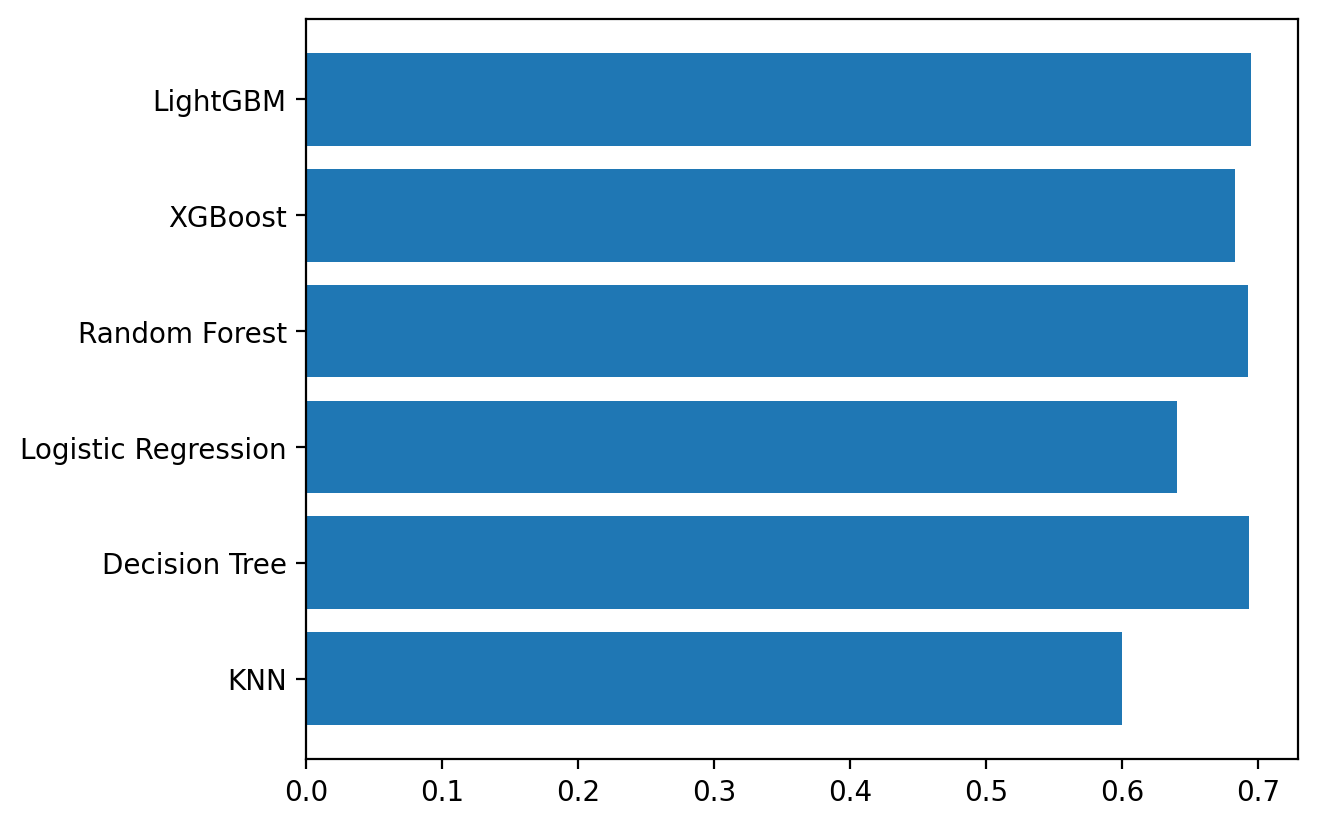

In [76]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

<BarContainer object of 6 artists>

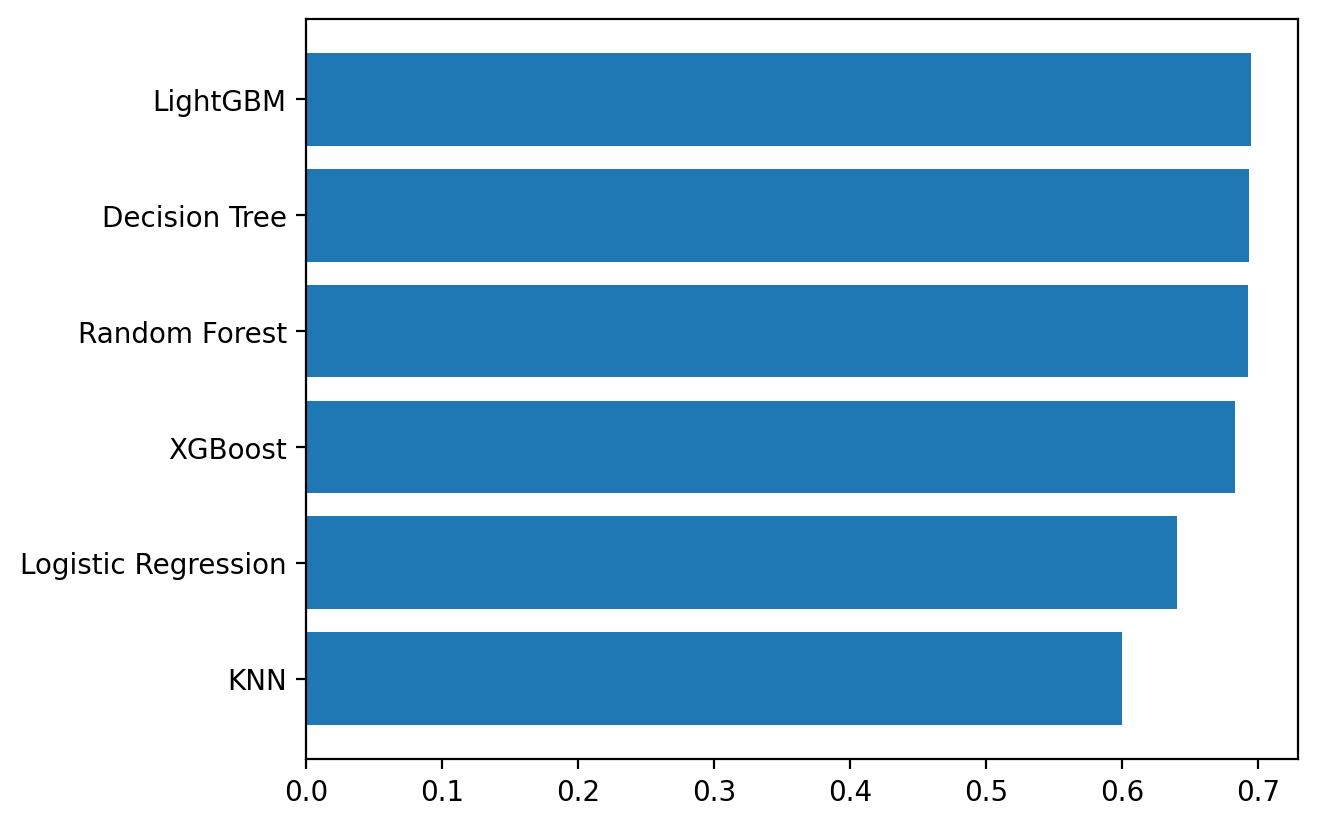

In [86]:
df = pd.DataFrame({
    'name':list(result),
    'score':result.values()
})
df.sort_values(by='score', ascending=True, inplace=True)

plt.barh(df['name'], df['score'])

In [81]:
# dataframe
pd.DataFrame(result, columns = ['name','score'])

,name,score


# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 LightGBM 모델 성능을 튜닝합니다.

In [93]:
# 기본 모델 선언
model_lgbm = LGBMClassifier()

# 파라미터 지정
  # max_depth: range(1, 21)
param = {
    'max_depth':range(3,21),
    'max_samples':range(17,23)
}

# 모델 선언
model = GridSearchCV(model_lgbm,
                    param,
                    cv=5,
                    scoring='accuracy' 
                    )


In [94]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Info] Number of positive: 5444, number of negative: 5756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486071 -> initscore=-0.055729
[LightGBM] [Info] Start training from score -0.055729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'max_depth': range(3, 21),
                         'max_samples': range(17, 23)},
             scoring='accuracy')

In [95]:
# 최적 파라미터, 예측 최고 성능
print('best parameter : ', model.best_params_)
print('best score : ', model.best_score_)


best parameter :  {'max_depth': 3, 'max_samples': 17}
best score :  0.6957142857142857


<BarContainer object of 20 artists>

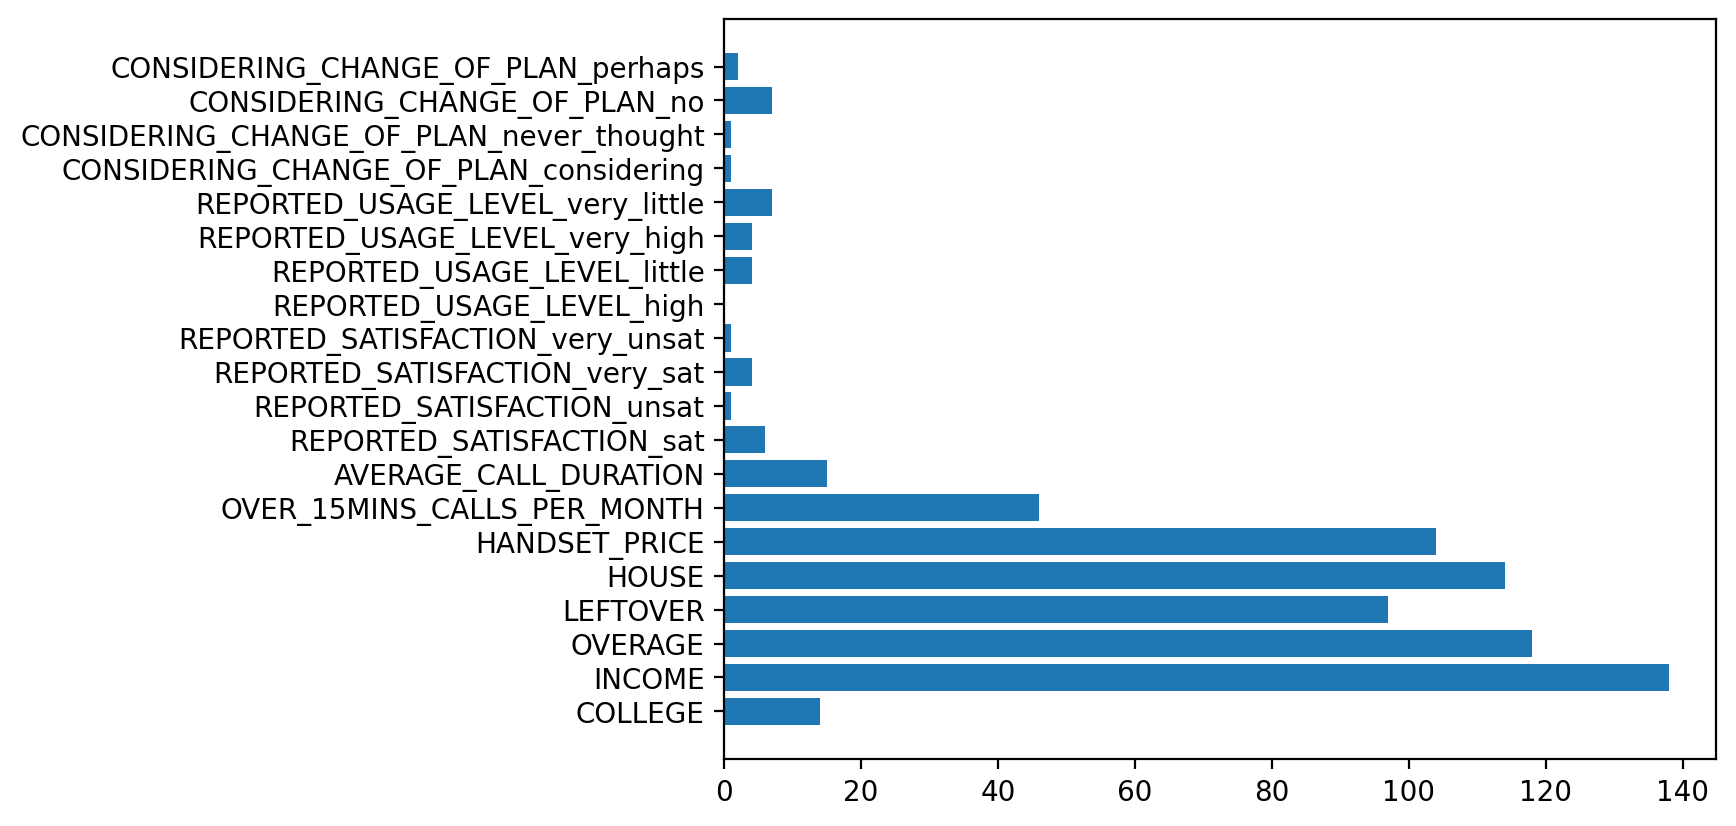

In [97]:
# 변수 중요도 시각화
plt.barh(list(X), model.best_estimator_.feature_importances_)



# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [99]:
# 예측하기
y_pred = model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: max_samples


In [101]:
y_pred.shape

(6000,)

In [102]:
# 성능평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2095  858]
 [ 910 2137]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2953
           1       0.71      0.70      0.71      3047

    accuracy                           0.71      6000
   macro avg       0.71      0.71      0.71      6000
weighted avg       0.71      0.71      0.71      6000



In [103]:
# model.cv_results_

{'mean_fit_time': array([0.06181927, 0.05944428, 0.06101928, 0.06872201, 0.06367221,
        0.0665905 , 0.08189988, 0.08387051, 0.10188184, 0.09069262,
        0.10053525, 0.09527669, 0.12532406, 0.14312849, 0.14609261,
        0.1274169 , 0.14442749, 0.1622416 , 0.17375512, 0.19261804,
        0.17455387, 0.1548306 , 0.17685223, 0.19978814, 0.1922627 ,
        0.20206213, 0.20194612, 0.17555113, 0.18758392, 0.21018224,
        0.1998282 , 0.21256003, 0.19144526, 0.18846369, 0.20486383,
        0.20209064, 0.21092758, 0.17051024, 0.19358869, 0.22630172,
        0.2180182 , 0.22230744, 0.19401026, 0.18656273, 0.2101429 ,
        0.20004745, 0.20499148, 0.21019831, 0.19344521, 0.20001945,
        0.23457699, 0.21156845, 0.19864821, 0.18302541, 0.19678392,
        0.20723591, 0.19328184, 0.1982717 , 0.17933621, 0.18670254,
        0.17675977, 0.18478875, 0.19784932, 0.19081092, 0.17648597,
        0.17331243, 0.19489636, 0.17720127, 0.19111762, 0.17571192,
        0.20079889, 0.16616759,